In [1]:
!pip install scikit-Learn

In [2]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
lower = string.ascii_lowercase
upper = string.ascii_uppercase
digit = string.digits
symbols = string.punctuation

In [4]:
# Since no labeled password strength dataset was found online, I designed my own by generating weak, medium, and strong password structures.

def weak_password():
  return ''.join(random.choices(lower+digit, k=random.randint(4,6)))

def medium_password():
  return ''.join(random.choices(lower+upper+digit, k=random.randint(6,10)))

def strong_password():
  return ''.join(random.choices(lower+upper+digit+symbols, k=random.randint(10,15)))

In [5]:
weak = [weak_password() for password in range(400)]
medium = [medium_password() for password in range(400)]
strong = [strong_password() for password in range(400)]

In [6]:
data = pd.DataFrame({
    'password': weak + medium + strong,
    'strength': ['weak']*400 + ['medium']*400 + ['strong']*400
})

In [7]:
data.to_csv("password.csv", index=False)

In [8]:
from google.colab import files
files.download("password.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
data = pd.read_csv("password.csv")

In [11]:
def extract_features(pwd):
  return [
      len(pwd),
      int(bool(re.search(r'[a-z]', pwd))),
      int(bool(re.search(r'[A-Z]', pwd))),
      int(bool(re.search(r'\d', pwd))),
      int(bool(re.search(r'[^A-Za-z0-9]', pwd)))
  ]

In [12]:
x = pd.DataFrame([extract_features(pwd) for pwd in data['password']], columns=['length', 'has_uc', 'has_lc', 'has_digits', 'has_specialC'])
y = data['strength'].map({'weak':0, 'medium':1, 'strong':2})

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
pred = model.predict(x_test)
print('Accuracy Score : ', accuracy_score(y_test, pred))

Accuracy Score :  0.9875


In [15]:
def predict_pwd_Strength(pwd):
  features = [extract_features(pwd)]
  pred = model.predict(features)[0]
  reverse = {0: 'weak', 1: 'medium', 2: 'strong'}
  return reverse[pred]

print(predict_pwd_Strength('Anshika@2025'))

strong


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


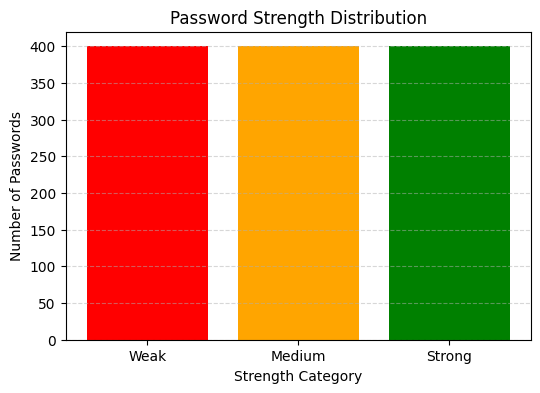

In [16]:
strength_counts = data['strength'].value_counts().sort_index()
labels = ['Weak', 'Medium', 'Strong']

plt.figure(figsize=(6,4))
plt.bar(labels, strength_counts, color=['red', 'orange', 'green']) # I tried customizing bar colors but ran into an error with undefined color names, so looked up valid options and fixed it.
plt.title("Password Strength Distribution")
plt.xlabel("Strength Category")
plt.ylabel("Number of Passwords")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [22]:
y_pred= model.predict(x_test) # Faced an error in the following code due to y_pred being undefined soon I understood the issue and added its definition here.

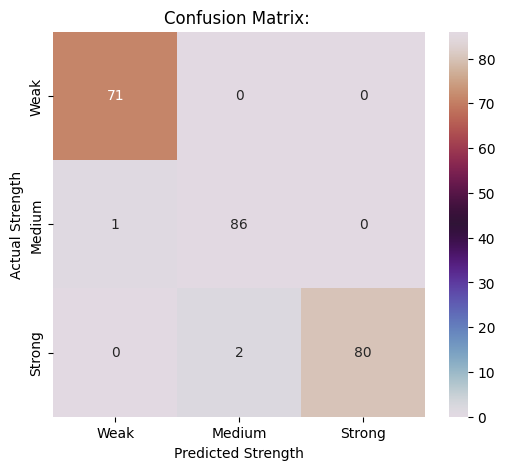

In [41]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Weak', 'Medium', 'Strong']
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='twilight', xticklabels=labels, yticklabels=labels)  # I mistakenly used yticklaeles here, took a while to find the error but corrected it...
plt.title('Confusion Matrix: ')
plt.xlabel("Predicted Strength")
plt.ylabel("Actual Strength")
plt.show()

In [33]:
print(plt.colormaps()) # Used plt.colormaps() to explore available heatmap color palettes. After testing several of them, I chose 'twilight' for its visually appealing gradient.

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

In [42]:
print(classification_report(y_test, y_pred, target_names=['Weak', 'Medium', 'Strong'])) # Used classification_report() to get a deeper understanding of my model’s performance beyond accuracy — including precision, recall, and F1-score for each class.

              precision    recall  f1-score   support

        Weak       0.99      1.00      0.99        71
      Medium       0.98      0.99      0.98        87
      Strong       1.00      0.98      0.99        82

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

